In [214]:
import pandas as pd
import numpy as np
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
plt.style.use("seaborn-whitegrid")

C:\Users\Benny Boi\AppData\Local\Temp\ipykernel_7544\3963306264.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [181]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 15

# Retail Dataset

### Data holds the basic information about sales data. The company have sales agencies / resellers and branches and the data file holds only the branch/reseller information in the customer field.

https://www.kaggle.com/datasets/shedai/retail-data-set

    -InvoiceID : ID of the transaction. A transaction might hold multiple records for the same customer at the same date with multiple products (SKU). DocumentID might be useful for combining the transactions and detecting the items sold together.
    -Date : Date of transaction / sell. In the date time format.
    -ProductID : Item / Product code. The unique code for each item sold.
    -TotalSales : Sales price for the transaction. If you want to get unit_price , divide TotalSales column to Quantity column
    -Discount : Discount amount for the transaction.
    -CustomerID : Unique customer id for each customer. For the data set, customer can be a reseller or a branch of the company.
    -Quantity : Number of items sold in the transaction.

<br><b>How to Use Data Set ?</br></b>
Some of the potential questions from the data might be listed as below, please add more to discussion if you have any idea:

<br><b>What is the optimum price for each item?</br></b>

    -Demand prediction for each item on next months.
    -Customer Lifetime Value for each Customer.
    -Customer Segmentation (an easy approach of RFM or more complex segmentations)
    -Customer <> Product Recommendation (what are the best products for the customers).

In [182]:
retail = pd.read_csv(r"C:\Users\Benny Boi\Repositories\Medoci\data\kaggle\competitions\clv_retail\retail.csv")

## Data cleaning

In [183]:
retail.shape

(29103, 8)

In [184]:
retail.columns

Index(['Unnamed: 0', 'InvoiceID', 'Date', 'ProductID', 'TotalSales',
       'Discount', 'CustomerID', 'Quantity'],
      dtype='object')

In [185]:
retail.head()

,Unnamed: 0,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,1,329,2019-12-27,524,355.932203,64.067797,185,2
2,2,330,2019-12-27,192,901.694915,162.305085,230,4
3,3,330,2019-12-27,218,182.754237,32.895763,230,1
4,4,330,2019-12-27,247,780.101695,140.418305,230,4


In [186]:
retail = retail[['InvoiceID', 'Date', 'ProductID', 'TotalSales',
       'Discount', 'CustomerID', 'Quantity']]

In [187]:
retail['Date'] = pd.to_datetime(retail['Date'],  yearfirst=True)
retail[['CustomerID', 'ProductID', 'InvoiceID']] = retail[['CustomerID', 'ProductID', 'InvoiceID']].astype(str)

In [188]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   InvoiceID   29103 non-null  object        
 1   Date        29103 non-null  datetime64[ns]
 2   ProductID   29103 non-null  object        
 3   TotalSales  29103 non-null  float64       
 4   Discount    29103 non-null  float64       
 5   CustomerID  29103 non-null  object        
 6   Quantity    29103 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [189]:
number_of_missing_df = retail.isnull().sum().sort_values(ascending = False)
percent_of_missing_df = ((retail.isnull().sum() / retail.isnull().count())*100).sort_values(ascending = False)

In [190]:
missing_df = pd.concat([number_of_missing_df,
                        percent_of_missing_df],
                        keys = ["total number of missing data", 'total percent of missing data'],
                        axis = 1)
missing_df.head(20)

,total number of missing data,total percent of missing data
InvoiceID,0,0.0
Date,0,0.0
ProductID,0,0.0
TotalSales,0,0.0
Discount,0,0.0
CustomerID,0,0.0
Quantity,0,0.0


In [191]:
retail.describe().T.style.background_gradient(cmap= 'magma')

,count,mean,std,min,25%,50%,75%,max
TotalSales,29103.000000,2552.679147,4568.256400,0.000000,779.661017,1366.101695,2847.457627,332574.460000
Discount,29103.000000,451.325294,650.359457,-0.004694,137.288136,244.067797,508.658644,14110.169492
Quantity,29103.000000,5.440367,6.804637,0.000000,2.000000,4.000000,4.000000,250.000000


In [192]:
retail.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [193]:
retail.InvoiceID.value_counts()

8716     53
8176     34
7861     34
8213     33
8405     31
         ..
4496      1
4497      1
4498      1
4499      1
13617     1
Name: InvoiceID, Length: 14079, dtype: int64

In [194]:
retail.query("InvoiceID == '8716'").head(), retail.query("InvoiceID == '8716'").shape

(      InvoiceID       Date ProductID   TotalSales    Discount CustomerID  \
 14316      8716 2020-06-19       252   935.593220  168.406780        230   
 14317      8716 2020-06-19      1857  1233.898305  222.101695        230   
 14318      8716 2020-06-19       251   366.101695   65.898305        230   
 14319      8716 2020-06-19       995   420.338983   75.661017        230   
 14320      8716 2020-06-19      1341   332.203390   59.796610        230   
 
        Quantity  
 14316         4  
 14317         4  
 14318         2  
 14319         2  
 14320         2  ,
 (53, 7))

In [195]:
retail.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [196]:
retail.columns

Index(['InvoiceID', 'Date', 'ProductID', 'TotalSales', 'Discount',
       'CustomerID', 'Quantity'],
      dtype='object')

Aggregating so that CustomerID is unique

In [197]:
agg_retail = retail[['CustomerID', 'ProductID', 'Quantity', 'TotalSales', 'Discount', 'Date']].groupby(['CustomerID', 'ProductID']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('TotalSales', 'sum'),
    TotalDiscount=('Discount', 'sum'),
    MinDate=('Date', 'min'),
    MaxDate=('Date', 'max'),
    Transactions=('Date', 'nunique')
).sort_values('CustomerID')

agg_retail = agg_retail.reset_index()

agg_retail


,CustomerID,ProductID,TotalQuantity,TotalSales,TotalDiscount,MinDate,MaxDate,Transactions
0,0,1000,2,5672.033898,1020.966102,2023-01-17,2023-01-19,2
1,0,1585,4,6485.559323,1167.400677,2022-12-06,2022-12-16,2
2,0,1724,6,7493.220339,1348.779661,2022-10-11,2022-11-14,2
3,0,1767,4,6101.694915,1098.305085,2023-03-14,2023-03-14,1
4,0,1834,1,1271.186441,228.813559,2022-08-18,2022-08-18,1
...,...,...,...,...,...,...,...,...
13864,99,1478,18,14915.254237,2684.745763,2022-08-01,2022-09-12,2
13865,99,1383,8,6644.067797,1195.932203,2022-08-12,2022-08-12,1
13866,99,650,16,13749.322034,2474.877966,2022-12-20,2023-01-10,2
13867,99,554,6,3381.355932,608.644068,2022-08-08,2022-08-08,1


In [198]:
agg_retail.sort_values('CustomerID').sort_index()

,CustomerID,ProductID,TotalQuantity,TotalSales,TotalDiscount,MinDate,MaxDate,Transactions
0,0,1000,2,5672.033898,1020.966102,2023-01-17,2023-01-19,2
1,0,1585,4,6485.559323,1167.400677,2022-12-06,2022-12-16,2
2,0,1724,6,7493.220339,1348.779661,2022-10-11,2022-11-14,2
3,0,1767,4,6101.694915,1098.305085,2023-03-14,2023-03-14,1
4,0,1834,1,1271.186441,228.813559,2022-08-18,2022-08-18,1
...,...,...,...,...,...,...,...,...
13864,99,1478,18,14915.254237,2684.745763,2022-08-01,2022-09-12,2
13865,99,1383,8,6644.067797,1195.932203,2022-08-12,2022-08-12,1
13866,99,650,16,13749.322034,2474.877966,2022-12-20,2023-01-10,2
13867,99,554,6,3381.355932,608.644068,2022-08-08,2022-08-08,1


## EDA

In [199]:
retail.CustomerID.nunique()

507

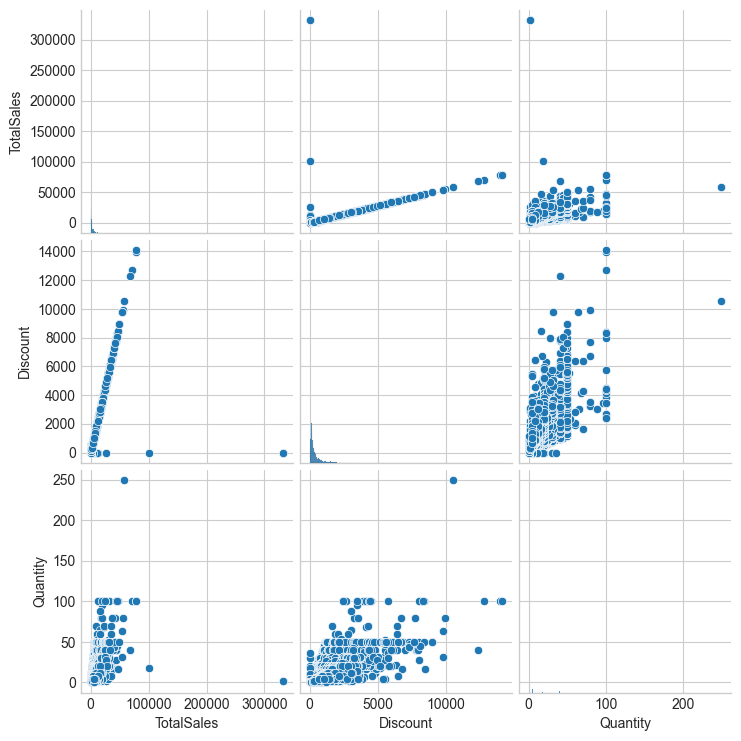

In [200]:
sns.pairplot(retail, vars=['TotalSales', 'Discount', 'Quantity'])
plt.show()

In [207]:
retail['Day'] = retail['Date'].dt.day
retail['Month'] = retail['Date'].dt.month
retail['Year'] = retail['Date'].dt.year
retail['MonthName'] = retail['Date'].dt.month_name()
retail['DayOfWeek'] = retail['Date'].dt.dayofweek
retail['DayOfYear'] = retail['Date'].dt.dayofyear

In [208]:
retail.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,Day,Month,Year,DayOfWeek,DayOfYear,MonthName
0,328,2019-12-27,1684,796.610169,143.389831,185,4,27,12,2019,4,361,December
1,329,2019-12-27,524,355.932203,64.067797,185,2,27,12,2019,4,361,December
2,330,2019-12-27,192,901.694915,162.305085,230,4,27,12,2019,4,361,December
3,330,2019-12-27,218,182.754237,32.895763,230,1,27,12,2019,4,361,December
4,330,2019-12-27,247,780.101695,140.418305,230,4,27,12,2019,4,361,December


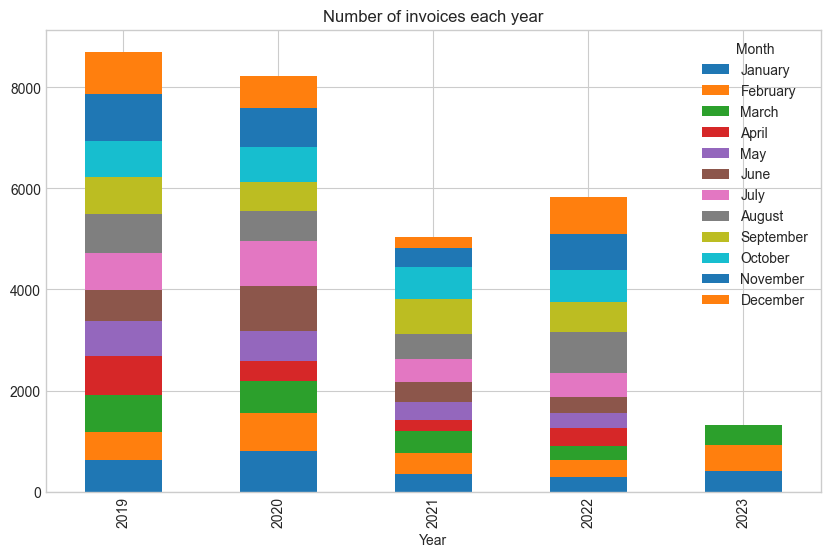

In [221]:
# Visualising amount of orders in each year with month hue
year_counts = retail['Year'].value_counts().head(20)
year_month_counts = retail.groupby(['Year', 'MonthName']).size().unstack().fillna(0).head(20)

month_order = list(calendar.month_name)[1:]

fig, ax = plt.subplots(figsize=(10, 6))

year_month_counts = year_month_counts.reindex(columns=month_order)

#colormap = plt.cm.get_cmap('viridis')

year_month_counts.plot(kind='bar', stacked=True, ax=ax) #colormap=colormap
ax.legend(title='Month')
ax.set_title("Number of invoices each year")

plt.show()

In [224]:
# Checking it matches the graph
retail.query('Year == 2019')['InvoiceID'].value_counts().sum()

8709

## RFM Segmentation
Recency - Frequency - Monetary Value